In [1]:
import tensorflow as tf

tf.__version__

'2.2.0'

The default values of weigths and biases depend on which type of layer we're using. For example, for a Dense layer, the weights are initialized according to the **glorot_uniform** initializer.  
The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where   $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$  
and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.  

### Initializng
If we want to initialize our own weights and biases, we should use the `kernel initializer` and `bias_initialiser`, which are used to set the weights and biases respectively.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [3]:
model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
Total params: 34,896
Trainable params: 34,896
Non-trainable params: 0
_________________________________________________________________


There are other ways we can initialize our parameters. We'll see them by adding two more layers to our model.

In [5]:
model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

Not only can we used built in initializers, but we can create our own initializers!

In [6]:
import tensorflow.keras.backend as K

In [7]:
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5

Let's visualize our parameters.

In [9]:
import matplotlib.pyplot as plt

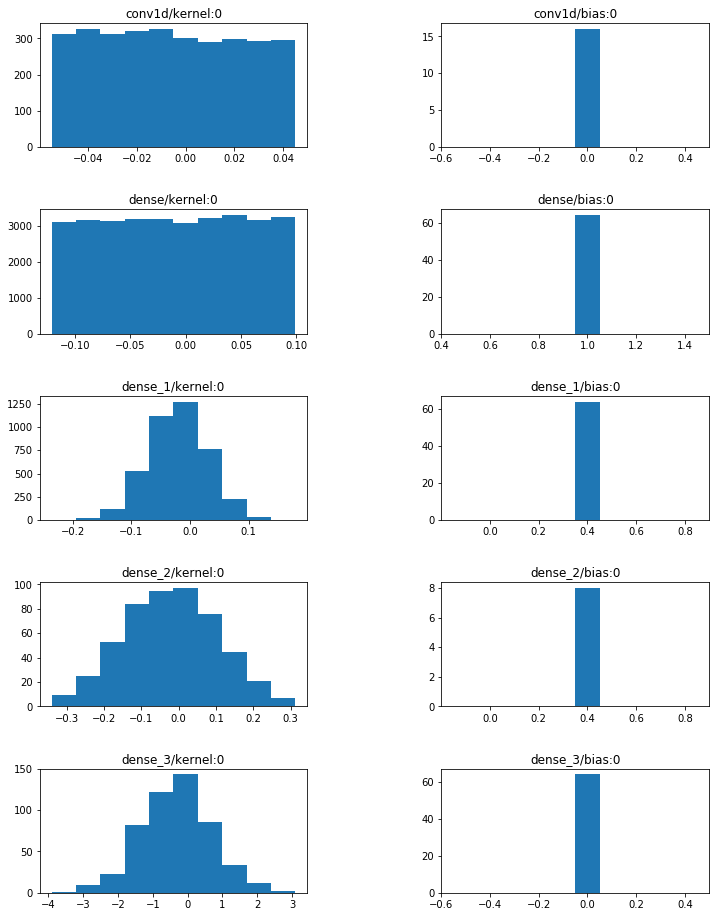

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)